In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Q1 Load the data and display the structure

In [2]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# creating a function which will give us features from the dataset
def data_feature(dataset):
    print("SHAPE OF THE DATA: ")
    print(dataset.shape)
    print("-"*90)
    print("INFORMATION OF THE DATA: ")
    print(dataset.info())
    print("-"*90)
    print("DESCRIPTION OF THE DATA")
    print(dataset.describe())
    print("-"*90)
    print("NUMBER OF NULL VALUES PRESENT IN THE DATA: ")
    print(dataset.isnull().sum())
    print("-"*90)
    print("COLUMN NAMES OF THE DATA: ")
    print(dataset.columns)
    print("-"*90)
    
data_feature(df)
    

SHAPE OF THE DATA: 
(7043, 21)
------------------------------------------------------------------------------------------
INFORMATION OF THE DATA: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   o

In [8]:
df.TotalCharges=pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges.isnull().sum()

0

In [6]:
# # imputinig the missing values using the mode of TotalCharges features
df['TotalCharges'].fillna(value=df['TotalCharges'].mode()[0],inplace=True)

In [7]:
# after imputation
df['TotalCharges'].isnull().sum()

0

In [9]:
df.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [ ]:
# Q4 Find out the churn based on contract and paperlessbilling attribute. 

In [12]:
colors=sns.color_palette("tab20c")

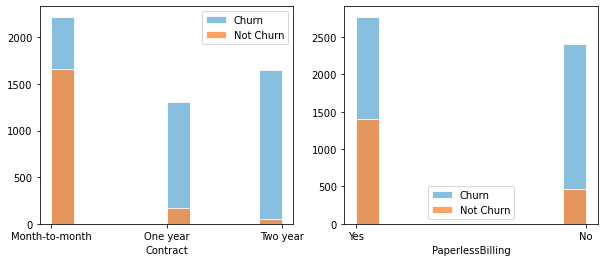

In [13]:
churn_0=df[['Contract', 'PaperlessBilling', 'Churn']][df['Churn']=='No']
churn_1=df[['Contract', 'PaperlessBilling', 'Churn']][df['Churn']=='Yes']

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.hist(churn_0['Contract'],label='Churn',alpha=0.8,color=colors[1],edgecolor='white')
plt.hist(churn_1['Contract'],label='Not Churn',alpha=0.8,color=colors[5],edgecolor='white')
plt.legend()
plt.xlabel("Contract")

plt.subplot(122)
plt.hist(churn_0['PaperlessBilling'],label='Churn',alpha=0.8,color=colors[1],edgecolor='white')
plt.hist(churn_1['PaperlessBilling'],label='Not Churn',alpha=0.8,color=colors[5],edgecolor='white')
plt.xlabel("PaperlessBilling")
plt.legend()

plt.show()

In [ ]:
# Q5 Plot histograms for Tenure, TotalCharges and Monthlycharges 

In [11]:
colors=sns.color_palette("tab20c")

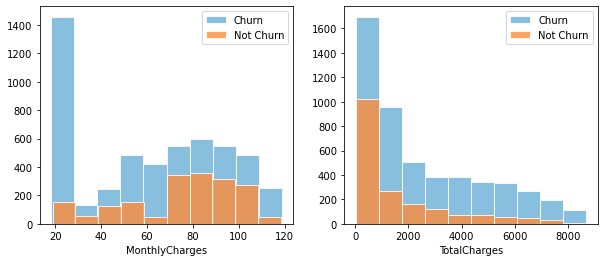

In [15]:
churn_0=df[['MonthlyCharges', 'TotalCharges', 'Churn']][df['Churn']=='No']
churn_1=df[['MonthlyCharges', 'TotalCharges', 'Churn']][df['Churn']=='Yes']

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.hist(churn_0['MonthlyCharges'],label='Churn',alpha=0.8,color=colors[1],edgecolor='white')
plt.hist(churn_1['MonthlyCharges'],label='Not Churn',alpha=0.8,color=colors[5],edgecolor='white')
plt.legend()
plt.xlabel("MonthlyCharges")

plt.subplot(122)
plt.hist(churn_0['TotalCharges'],label='Churn',alpha=0.8,color=colors[1],edgecolor='white')
plt.hist(churn_1['TotalCharges'],label='Not Churn',alpha=0.8,color=colors[5],edgecolor='white')
plt.xlabel("TotalCharges")
plt.legend()

plt.show()

In [22]:
# Display density plot  for TotalCharges vs  Churn(Yes/No) and MonthlyCharges vs 	churn(Yes/No) 